## **Wine Data Classification**
This is a classification problem involving wine quality.

In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Step 1
Read in the dataset as a dataframe, and explore the data. As we explore, we are looking to determine what our target variable is.

In [30]:
wineDf = pd.read_csv("wineQualityReds.csv")

pd.set_option("display.max_columns", None)

wineDf.drop(wineDf.columns[0], axis=1, inplace=True)
print(wineDf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         1599 non-null   float64
 1   volatile.acidity      1599 non-null   float64
 2   citric.acid           1599 non-null   float64
 3   residual.sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free.sulfur.dioxide   1599 non-null   float64
 6   total.sulfur.dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


We can see that the dataset contains various types of information about each wine. Our target variable is going to be the ["quality"].

In [31]:
y = wineDf["quality"]
X = wineDf.drop(columns=["quality"])
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         1599 non-null   float64
 1   volatile.acidity      1599 non-null   float64
 2   citric.acid           1599 non-null   float64
 3   residual.sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free.sulfur.dioxide   1599 non-null   float64
 6   total.sulfur.dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
dtypes: float64(11)
memory usage: 137.5 KB
None


Since all the datatypes are floats, we will not be needing to convert any to dummy variables.\
Finally, we want to standardize (scale) the data. In this case, we will use StandardScaler().

In [32]:
X_scaled = StandardScaler().fit_transform(X)

### Step 2
Split the Feature Matrix and Target Variable into two partitions. \
We will use the parameters of 70% training and 30% testing.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.30,random_state=2023,stratify=y)


### Step 3
Train the network using a model of your choice. \
For this problem we will be using a type of neural network called the MLPClassifier.


MLPClassifiers are in short a multi-layered perceptron classifier, which optimizes the log-loss function. \
While the classifier has many different parameters, these will be the ones that we will be specifying here.
- Hidden layer sizes
 - We specify the number of neurons in the ith layer. In our case, we will be using 3 layers each with 12 neurons.
- Activation function for the hidden layer
- Solver for weight optimization
- Maximum iterations
- Verbose
 - Whether to print progres messages
- Random state
 - Determines random number generation for weights and bias initialization

In [34]:
mlp = MLPClassifier(hidden_layer_sizes=(12, 12, 12), activation="relu", solver="adam", max_iter=3000, verbose=True, random_state=1)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

Iteration 1, loss = 1.88373893
Iteration 2, loss = 1.81046221
Iteration 3, loss = 1.74512647
Iteration 4, loss = 1.68358437
Iteration 5, loss = 1.62858887
Iteration 6, loss = 1.57770285
Iteration 7, loss = 1.52996676
Iteration 8, loss = 1.48764357
Iteration 9, loss = 1.44750200
Iteration 10, loss = 1.40993147
Iteration 11, loss = 1.37492725
Iteration 12, loss = 1.34259334
Iteration 13, loss = 1.31277725
Iteration 14, loss = 1.28499889
Iteration 15, loss = 1.26066992
Iteration 16, loss = 1.23771827
Iteration 17, loss = 1.21681423
Iteration 18, loss = 1.19802614
Iteration 19, loss = 1.17977972
Iteration 20, loss = 1.16305561
Iteration 21, loss = 1.14749907
Iteration 22, loss = 1.13346423
Iteration 23, loss = 1.11976810
Iteration 24, loss = 1.10802584
Iteration 25, loss = 1.09621313
Iteration 26, loss = 1.08563602
Iteration 27, loss = 1.07538174
Iteration 28, loss = 1.06644206
Iteration 29, loss = 1.05778435
Iteration 30, loss = 1.04959674
Iteration 31, loss = 1.04241494
Iteration 32, los

### Step 4
Analyze the result of your model. \
This includes looking at the loss curve, accuracy, and confusion matrix.

Let's first take a look at the loss curve.

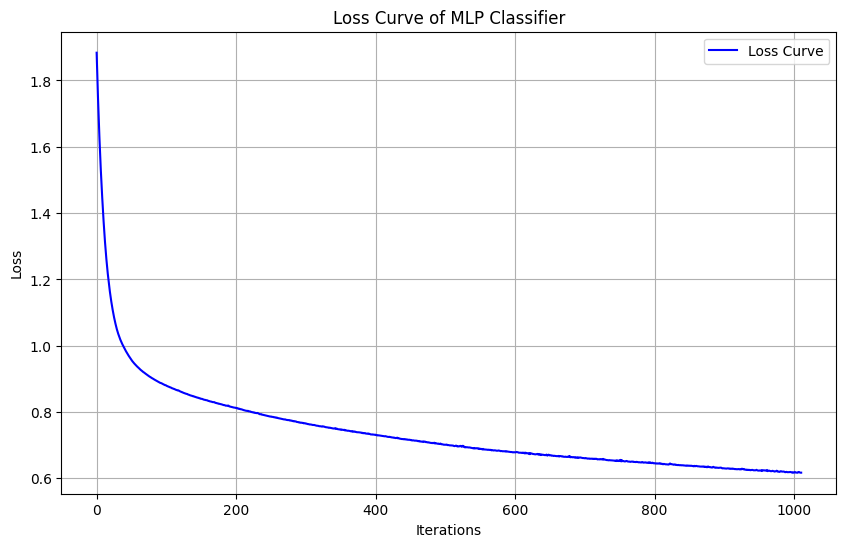

In [35]:
loss_curve = mlp.loss_curve_
plt.figure(figsize=(10, 6))
plt.plot(loss_curve, label='Loss Curve', color='blue')
plt.title('Loss Curve of MLP Classifier')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Now the accuracy:

In [36]:
accuracy = mlp.score(X_train, y_train)
print(f"Train Accuracy: {accuracy:.4f}")
accuracy = mlp.score(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Train Accuracy: 0.7542
Test Accuracy: 0.5875


For this accuracy test, we utilized the <model>.score method, which quantifies the quality of the predictions. \
We can note here that the train accuracy is higher than the test accuracy, which would make sense because the model was trained on the training dataset.

Lastly, we can look at the confusion matrix.

<Figure size 800x600 with 0 Axes>

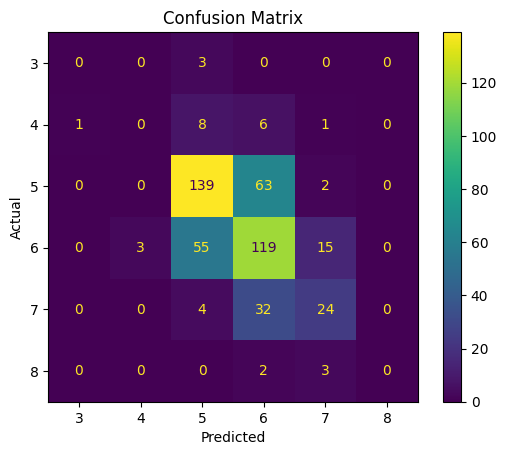

In [37]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_).plot()
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Step 5
Predicting the wine quality of a specific wine.

Let's have the model predict the wine quality of a wine with these numbers: \

|feature|value|
|----|----|
|fixed.acidity|8|
|volatile.acidity|0.6|
|citric.acid|0|
|residual.sugar|2.0|
|chlorides|0.076|
|free.sulfur.dioxide|10|
|total.sulfur.dioxide|30|
|density|0.9978|
|pH|3.20|
|sulphates|0.5|
|alcohol|10.0|

In [38]:
wine_sample = [[8, 0.6, 0, 2.0, 0.076, 10, 30, 0.9978, 3.20, 0.5, 10.0]]

df = pd.DataFrame(wine_sample)
sample_scaled = StandardScaler().fit_transform(df)
print("Quality of this wine is:",mlp.predict(sample_scaled)[0])

Quality of this wine is: 6


### BONUS STEP
To further explore MLPClassifiers, we can try out different network architectures. \

Below we will try 3 different types.

Version 1: Only 1 hidden layer.

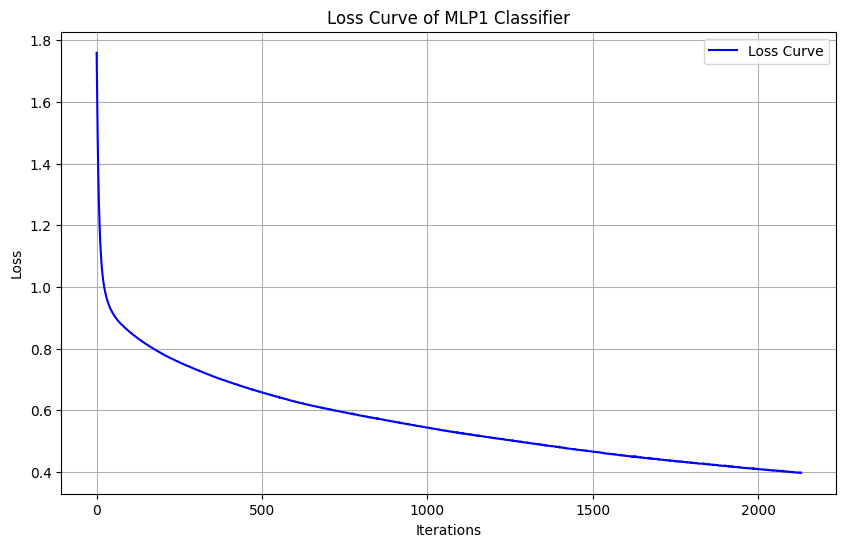

Train Accuracy for MLP1: 0.8552
Test Accuracy for MLP1: 0.6104


In [39]:
mlp1 = MLPClassifier(hidden_layer_sizes=(50), activation="relu", solver="adam", max_iter=3000, verbose=False, random_state=1)
mlp1.fit(X_train, y_train)
y_pred1 = mlp1.predict(X_test)
loss_curve = mlp1.loss_curve_
plt.figure(figsize=(10, 6))
plt.plot(loss_curve, label='Loss Curve', color='blue')
plt.title('Loss Curve of MLP1 Classifier')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
accuracy = mlp1.score(X_train, y_train)
print(f"Train Accuracy for MLP1: {accuracy:.4f}")
accuracy = mlp1.score(X_test, y_test)
print(f"Test Accuracy for MLP1: {accuracy:.4f}")

Version 2: 2 hidden layers.

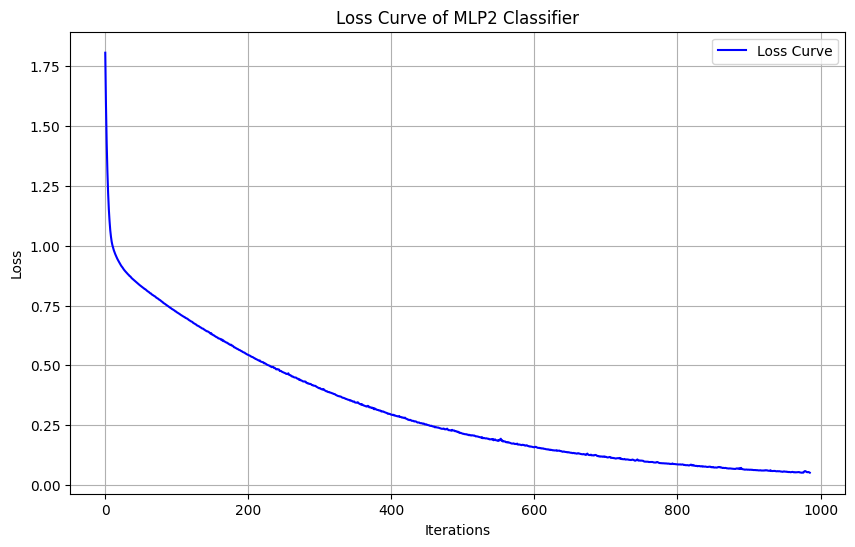

Train Accuracy for MLP2: 0.9937
Test Accuracy for MLP2: 0.6417


In [40]:
mlp2 = MLPClassifier(hidden_layer_sizes=(50,50), activation="relu", solver="adam", max_iter=3000, verbose=False, random_state=1)
mlp2.fit(X_train, y_train)
y_pred2 = mlp2.predict(X_test)
loss_curve = mlp2.loss_curve_
plt.figure(figsize=(10, 6))
plt.plot(loss_curve, label='Loss Curve', color='blue')
plt.title('Loss Curve of MLP2 Classifier')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
accuracy = mlp2.score(X_train, y_train)
print(f"Train Accuracy for MLP2: {accuracy:.4f}")
accuracy = mlp2.score(X_test, y_test)
print(f"Test Accuracy for MLP2: {accuracy:.4f}")

Version 3: 3 hidden layers.

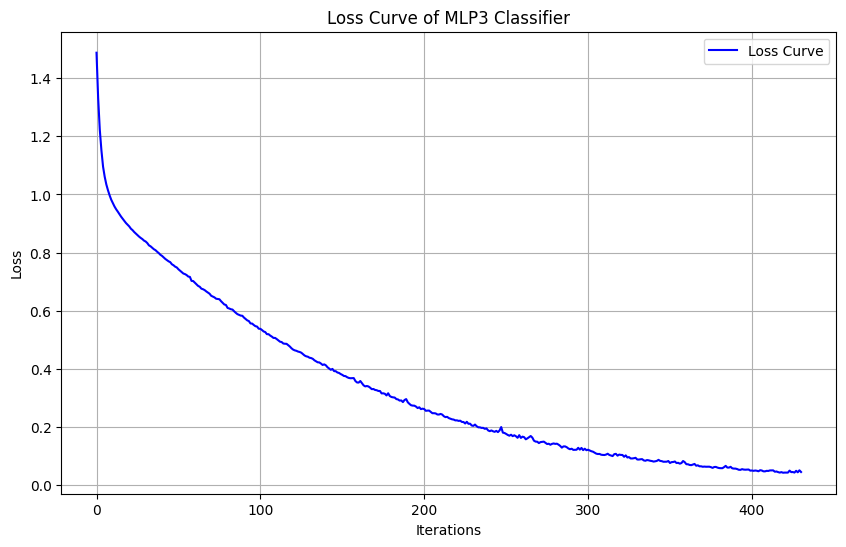

Train Accuracy for MLP3: 0.9946
Test Accuracy for MLP3: 0.6562


In [41]:
mlp3 = MLPClassifier(hidden_layer_sizes=(50,50,50), activation="relu", solver="adam", max_iter=3000, verbose=False, random_state=1)
mlp3.fit(X_train, y_train)
y_pred3 = mlp3.predict(X_test)
loss_curve = mlp3.loss_curve_
plt.figure(figsize=(10, 6))
plt.plot(loss_curve, label='Loss Curve', color='blue')
plt.title('Loss Curve of MLP3 Classifier')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
accuracy = mlp3.score(X_train, y_train)
print(f"Train Accuracy for MLP3: {accuracy:.4f}")
accuracy = mlp3.score(X_test, y_test)
print(f"Test Accuracy for MLP3: {accuracy:.4f}")

#### Conclusion

Both the training and testing accuracies go up as we increase the number of hidden layers. \
From the loss curves, we can see that the number of iterations necessary to reach a sufficiently low level of loss decreases each time.
The first one needs over 2000 iterations, while the last one only needs around 400.
This means that it is able to find a good fit much more quickly.

All in all, the more layers the classifier has, the model will find a good fit faster and ultimately be more accurate.